In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib notebook
from scipy import misc

import time

Let's do some setup and  load in image 

/home/ivar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


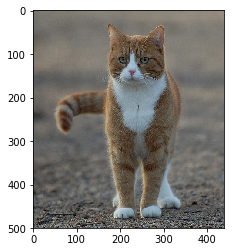

Image size: (500, 439, 3)


In [5]:
img = misc.imread('cat.png').astype(np.float)/255
#plt.figure()
plt.imshow(img)
plt.show()
start = time.time()
#out1 = sobel_filter(img)
#out2 = blur_filter(img)
#print('Calculation time:', time.time()-start, 'sec')
print('Image size:',img.shape)

Now, implement convolution of image of NxM pixels and C spectral bands (C=3 for a RGB image) 
with a filter kernel of size Nk x Mk. THis image has 500*439pixels and 3 band since it is a colour image. 

To compute the result of pixel (i,j,c), place the filter kernel at pixel (i,j,c) and multiply the image and the filter at all locations where the filter overlaps the image, then sum the result. 
This sum can be computed using np.sum, or you can use 2 for-loops (this will be slower).

To compute the result of all pixels we need a for loop over all the indexes, in this case three for loops over image width (N), height (M) and number of channels (C). 

In this example we compute convolution only at those pixels where the filter kernel fits inside the image. 

First, implement convolution_loops where you in addition to the 3 outer loops also loop over the filter kernel.  See lecture notes for formula. 


In [6]:
def convolution_loops(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    out = np.zeros(image.shape)
    if kernel.shape[0] != kernel.shape[1]:
        return "Kernel not square matrix"
    else:
        kernel = kernel[::-1, ::-1]
        h_1 = np.int_(np.floor((kernel.shape[0]-1)/2))
        for b in range(out.shape[2]):
            for y in range(out.shape[0]):
                for x in range(out.shape[1]):
                    currsum = 0.0;
                    if y >= h_1 and y < out.shape[0] - h_1 and x >= h_1 and x < out.shape[1] - h_1:
                        for j in range(-h_1, h_1+1, 1):
                            for i in range(-h_1, h_1+1, 1):
                                currsum = currsum + kernel[j,i]*image[y-j,x-i,b]
                    out[y,x,b] = currsum
        return out
"""
def convolution_loops(image, kernel):
  
  #Write a general function to convolve an image with an arbitrary kernel.
  
  out = np.zeros(image.shape)
  
  #kernel = kernel[::-1, ::-1] #Flipping kernel to follow convention

  N, M, C = image.shape
  Nk, Mk = kernel.shape
  nk_2 = Nk // 2
  mk_2 = Mk // 2
  for i in range(nk_2, N - nk_2):
    for j in range(mk_2, M - mk_2):
      for c in range(C):
        currsum = 0.0;
        for k in range(-nk_2,nk_2):
            for l in range(-mk_2,mk_2):
               currsum = currsum + image[i-k,j-l,c]*kernel[k,l]
        
        
        out[i, j, c] = currsum
  return out
"""

'\ndef convolution_loops(image, kernel):\n  \n  #Write a general function to convolve an image with an arbitrary kernel.\n  \n  out = np.zeros(image.shape)\n  \n  #kernel = kernel[::-1, ::-1] #Flipping kernel to follow convention\n\n  N, M, C = image.shape\n  Nk, Mk = kernel.shape\n  nk_2 = Nk // 2\n  mk_2 = Mk // 2\n  for i in range(nk_2, N - nk_2):\n    for j in range(mk_2, M - mk_2):\n      for c in range(C):\n        currsum = 0.0;\n        for k in range(-nk_2,nk_2):\n            for l in range(-mk_2,mk_2):\n               currsum = currsum + image[i-k,j-l,c]*kernel[k,l]\n        \n        \n        out[i, j, c] = currsum\n  return out\n'

Now, replace the loop over the filter kernel by using either np.sum or np.dot (the latter after reshaping the current subwindow and the filter into a 1D vectors of length (1,Nk*Mk) 

In [7]:
def convolution(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    out = np.zeros(image.shape)
    if kernel.shape[0] != kernel.shape[1]:
        return "Kernel not square matrix"
    else:
        kernel = kernel[::-1, ::-1]
        h_1 = np.int_(np.floor((kernel.shape[0]-1)/2))
        for b in range(out.shape[2]):
            for y in range(out.shape[0]):
                for x in range(out.shape[1]):
                    if y >= h_1 and y < out.shape[0] - h_1 and x >= h_1 and x < out.shape[1] - h_1:
                        out[y,x,b] = np.sum(image[y-h_1:y+h_1+1,x-h_1:x+h_1+1,b]*kernel)              
        return out

def convolution_prettier(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    # Flipping kernel to so that it is convolution and not correlation.
    kernel = kernel[::-1, ::-1]

    height_image, width_image, channel_image = image.shape
    
    # Todd: Do zero padding instead.
    out = np.zeros(image.shape)

    height_kernel, width_kernel = kernel.shape

    half_height_kernel, half_width_kernel = \
        np.int(np.floor((height_kernel-1)/2)), np.int(np.floor((width_kernel-1)/2))

    for channel in range(channel_image):
        for y in range(height_image):
            for x in range(width_image):
                
                if y >= half_height_kernel \
                and y < height_image - half_height_kernel \
                and x >= half_width_kernel \
                and x < width_image - half_width_kernel:
                    
                    out[y,x,channel] = \
                    np.sum(image[y-half_height_kernel:y+half_height_kernel+1,x-half_width_kernel:x+half_width_kernel+1,channel]*kernel)              
    return out

def convolution_prettier_faster(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    # Flipping kernel to so that it is convolution and not correlation.
    kernel = kernel[::-1, ::-1]

    height_image, width_image, channel_image = image.shape
    
    # Todd: Account for padding and striding.
    out = np.zeros(image.shape)

    height_kernel, width_kernel = kernel.shape

    half_height_kernel, half_width_kernel = \
        np.int(np.floor((height_kernel-1)/2)), np.int(np.floor((width_kernel-1)/2))
    
    #print(np.swapaxes((kernel*np.ones(shape=(channel_image, height_kernel, width_kernel))).T, 0, 1))
    
    for y in range(height_image):
        for x in range(width_image):

            if y >= half_height_kernel \
            and y < height_image - half_height_kernel \
            and x >= half_width_kernel \
            and x < width_image - half_width_kernel:
                
                out[y,x,:] = \
                np.sum(image[y-half_height_kernel:y+half_height_kernel+1,\
                             x-half_width_kernel:x+half_width_kernel+1,\
                             :]*np.swapaxes((kernel*np.ones(shape=(channel_image, height_kernel, width_kernel))).T, 0, 1), axis=(0, 1))

    return out

def compute_convolved_image_shape(input_heigth, \
                               input_width, \
                               kernel_heigth, \
                               kernel_width, \
                               pad_size, \
                               stride):
    # Formula for the spatial dimensions of an image
    # in an convolutional output layer.
    return np.int(np.floor(1 + (input_heigth + 2*pad_size - kernel_heigth)/stride)), \
            np.int(np.floor(1 + (input_width + 2*pad_size - kernel_width)/stride))

def convolution_prettiest(input_image, weights, pad_size=0, stride=1):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    # Flipping weights/kernel to so that it is convolution and not correlation.
    weights = weights[::-1, ::-1]

    height_weights, width_weights = weights.shape
        
    height_input_image, width_input_image, channels_input_image = input_image.shape
    
    # Assuming that the filter size is num_filters = 
    # channels_output_image = channels_input_image = 3
    channels_output_image = channels_input_image
    
    input_image_padded = \
    np.pad(input_image, ((pad_size,), (pad_size,), (0,)), mode="constant", constant_values=0)
    
    # Define dimension of output image.
    height_output_image, width_output_image,  = \
                    compute_convolved_image_shape(height_input_image, \
                                                 width_input_image, \
                                                 height_weights, \
                                                 width_weights, \
                                                 pad_size, \
                                                 stride)
    
    output_image = np.zeros(shape=(height_output_image, \
                                   width_output_image, \
                                   channels_output_image))

    weights_broadcasted = \
    np.swapaxes((weights*np.ones(shape=(channels_input_image, height_weights, width_weights))).T, 0, 1)
    
    #print(weights_broadcasted)

    
    for y in range(height_output_image):
        for x in range(width_output_image):

                input_image_padded_masked = \
                input_image_padded[y*stride:y*stride+height_weights, x*stride:x*stride+width_weights, :]
                            
                output_image[y, x, :] = \
                np.sum(input_image_padded_masked * weights_broadcasted, axis=(0, 1))

    return output_image


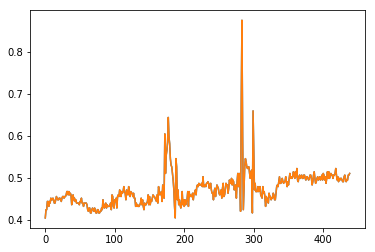

In [8]:
# Checking a line profile

plt.figure()

plt.plot(img[40, :, 0])

plt.plot(np.pad(img, ((0,), (0,), (0,)), mode="constant", constant_values=0)[40, :, 0])

Calculation time without inner lopps: 8.023988246917725 sec
Calculation time without inner lopps and channel loop: 4.821940898895264 sec


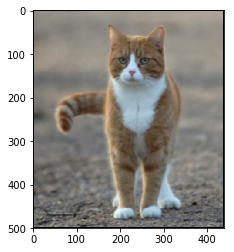

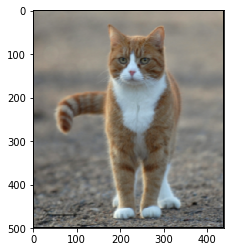

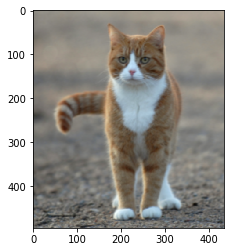

In [9]:
# Check that your image looks correct with a given artbitraty filter
img = plt.imread('cat.png')

kernel = np.arange(25).reshape((5, 5))

start= time.time()
out1 = convolution_prettier_faster(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time without inner lopps:', time.time()-start, 'sec')

start= time.time()
out2 = convolution_prettiest(img, kernel)

#out1 = sobel_filter(img) 
#out2 = blur_filter(img)
print('Calculation time without inner lopps and channel loop:', time.time()-start, 'sec')


#out1 -= out1.min()
out1 /= out1.max()
#out2 -= out2.min()
out2 /= out2.max()


correct = plt.imread('convolution_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out1, vmin=out1.min(), vmax=out1.max())
plt.show()
plt.figure()
plt.imshow(out2, vmin=out2.min(), vmax=out2.max())
plt.show()


False


/home/ivar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


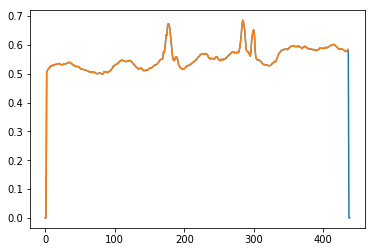

In [10]:
# Verifying that line profiles of the non-padded (convolution_prettier_faster) and padded (convolution_prettiest)
# are actually identical at corresponding pixels.

print(np.all(out1 == out2))
plt.figure()
plt.plot(out1[40, :, 0])
plt.plot(np.append([0, 0], out2[38, :, 0]))
#plt.plot(out2[40+10, :, 0])

In [11]:
# Verify no difference in pixel scaling

a = out1[40, :, 0][41]
b = np.append([0, 0], out2[38, :, 0])[41]

b/a

np.all(b/a == 1.0)

True

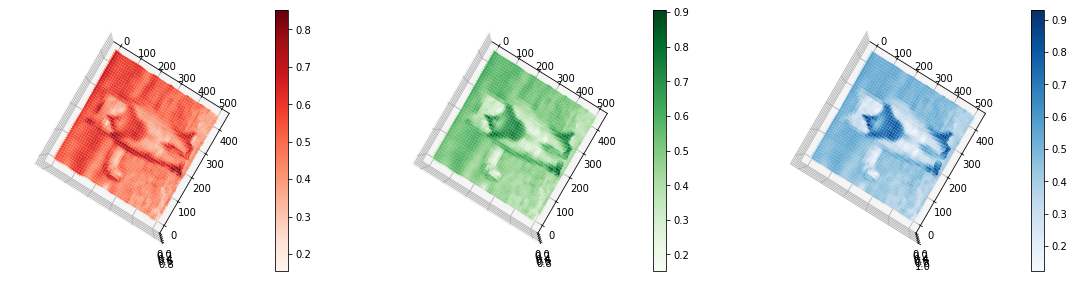

In [12]:
# Playing with surface plots of the RGB image.

from mpl_toolkits.mplot3d import Axes3D

h, w, c = out1.shape

X1, X2, X3 = (np.arange(w)*np.ones((h,w)) for i in range(c))
Y1, Y2, Y3 = (np.flip((np.arange(h)*np.ones((w,h))).T, axis=1) for i in range(c))
Z1, Z2, Z3 = (out1[:,:,i] for i in range(c))

fig = plt.figure(figsize=[1*3*6.4, 1*4.8])

ax1 = fig.add_subplot(131, projection='3d')
ax1.view_init(elev=90)
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(elev=90)
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(elev=90)

subfig1 = ax1.plot_surface(Y1, X1, Z1, cmap="Reds")
fig.colorbar(subfig1, ax=ax1)
subfig2 = ax2.plot_surface(Y2, X2, Z2, cmap="Greens")
fig.colorbar(subfig2, ax=ax2)
subfig3 = ax3.plot_surface(Y3, X3, Z3, cmap="Blues")
fig.colorbar(subfig3, ax=ax3)

#plt.figure()
#plt.imshow(Z)

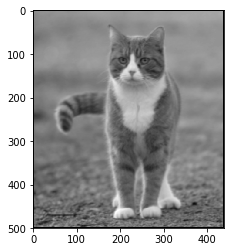

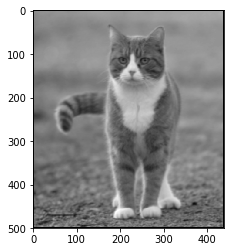

In [13]:
# Verify identical grayscale images with different sum methods (of RGB values).

plt.figure()
plt.imshow(np.sum(out1, axis=2), cmap="gray")
plt.figure()
plt.imshow(Z1+Z2+Z3, cmap="gray")

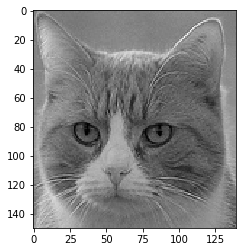

In [14]:
h, w, c = img.shape
d = w
plt.figure()
plt.imshow((img[:, :, 0]*np.ones(shape=(d, h, w)))[0, 30:180, 170:310], cmap="gray")

/home/ivar/anaconda3/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


(28, 148, 138)


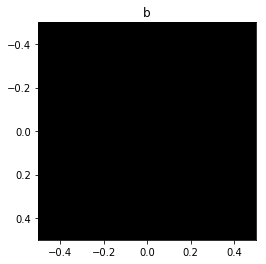

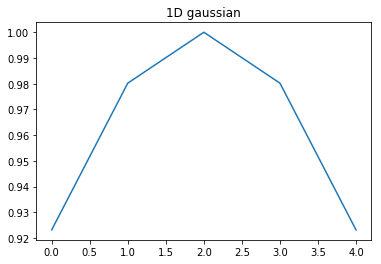

In [15]:
# Make the cat image to a fake 3D image of the RED channel and perform 3D convolutions.
# Preparing ipyvolume volume plot parameters for visualizing volumes to be convoluted.
# Making 3D volumes out of existing data.

import ipyvolume as ipv
from scipy import signal

# ipyvolume uses by default a transfer function to visualize head voxel data in three dimensions:
# Red, Green, Blue. 
# I want it to show the data as realistic as possible, 
# therefore wanting grayscale by forcing RGB values to be identical.
# This is done by equal RBG values in level and opacity setting.

# NB! max_shape > largest dimension of volume to show entire volume.
volume_plot_parameters = {
    "lighting" : False,
    "data_min" : None,
    "data_max" : None,
    "max_shape" : 256,
    "tf" : None,
    "stereo" : False,
    "ambient_coefficient" : 0.5,
    "diffuse_coefficient": 0.8,
    "specular_coefficient" : 0.5,
    "specular_exponent" : 0.5,
    "level" : 0.5*np.ones(3),
    "opacity" : 0.1*np.ones(3),
    "level_width" : 0.1*np.ones(3),
    "controls" : True,
    "max_opacity" : 0.2
}

def plot_volume(volume_data, parameters):
    # Kept for more interesting data:
    # level=[0.1, 0.5, 0.9], \
    # opacity=[0.01, 0.05, 0.1], \
    ipv.figure()
    widget = ipv.pylab.volshow(volume_data, \
                                 lighting=parameters["lighting"], \
                                 data_min=parameters["data_min"], \
                                 data_max=parameters["data_max"], \
                                 max_shape=parameters["max_shape"], \
                                 tf=parameters["tf"], \
                                 stereo=parameters["stereo"], \
                                 ambient_coefficient=parameters["ambient_coefficient"], \
                                 diffuse_coefficient=parameters["diffuse_coefficient"], \
                                 specular_coefficient=parameters["specular_coefficient"], \
                                 specular_exponent=parameters["specular_exponent"], \
                                 level=parameters["level"], \
                                 opacity=parameters["opacity"], \
                                 level_width=parameters["level_width"], \
                                 controls=parameters["controls"], \
                                 max_opacity=parameters["max_opacity"])
    ipv.show()
    return widget

# Red channel broadcasted to 3D
h, w, c = img.shape
# Determining the third dimension, depth
d = w

starty = 30
endy = 180

startx = 170
endx = 310


x = img[starty:endy, startx:endx, 0]*np.ones(shape=(30, endy-starty, endx-startx))
#x = img[:, :, 0]*np.ones(shape=(d, h, w))

# A broadcasted 2D gaussian kernel to accomplish smoothing
gaussian = signal.gaussian(5, 5).reshape((5, 1))
w = gaussian*(gaussian.T)*gaussian.reshape((5, 1, 1))

b = 2

# Plot x, w and b
volume_plot_parameters["level"] = 0.2*np.ones(3)
volume_plot_parameters["opacity"] = 0.2*np.ones(3)
plot_volume(x, volume_plot_parameters)
volume_plot_parameters["level"] = 0.9*np.ones(3)
plot_volume(w, volume_plot_parameters)
plt.figure()
plt.title("b")
plt.imshow(np.array([[b]]), cmap="gray")

plt.figure()
plt.title("1D gaussian")
plt.plot(gaussian)

# Implement 3D convolution.

def compute_convolved_image_shape_3D(input_depth, \
                                     input_height, \
                                     input_width, \
                                     kernel_depth, \
                                     kernel_height, \
                                     kernel_width, \
                                     pad_size, \
                                     stride):
    # Formula for the spatial dimensions of an image
    # in an convolutional output layer.
    return np.int(np.floor(1 + (input_depth + 2*pad_size - kernel_depth)/stride)), \
            np.int(np.floor(1 + (input_height + 2*pad_size - kernel_height)/stride)), \
            np.int(np.floor(1 + (input_width + 2*pad_size - kernel_width)/stride))

def convolution_3D(input_image, weights, pad_size=0, stride=1):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    # Flipping weights/kernel to so that it is convolution and not correlation.
    #weights = weights[::-1, ::-1]

    depth_weights, height_weights, width_weights = weights.shape
    
    depth_input_image, height_input_image, width_input_image = input_image.shape
    
    input_image_padded = \
    np.pad(input_image, ((pad_size,), (pad_size,), (pad_size,)), mode="constant", constant_values=0)
    
    # Define dimension of output image.
    depth_output_image, height_output_image, width_output_image,  = \
    compute_convolved_image_shape_3D(depth_input_image, \
                                     height_input_image, \
                                     width_input_image, \
                                     depth_weights, \
                                     height_weights, \
                                     width_weights, \
                                     pad_size, \
                                     stride)
    
    output_image = np.zeros(shape=(depth_output_image, \
                                   height_output_image, \
                                   width_output_image))
    for z in range(depth_output_image):
        for y in range(height_output_image):
            for x in range(width_output_image):

                    input_image_padded_masked = \
                    input_image_padded[z*stride:z*stride+depth_weights, y*stride:y*stride+height_weights, x*stride:x*stride+width_weights]

                    output_image[z, y, x] = \
                    np.sum(input_image_padded_masked * weights)

    return output_image

# Now is time to compute the 3D convolution (correlation if kernel not flipped)
# y = x (convolved with) w + b

# A padding of 1 is necesary to evaluate y for the shaded pixels, which is y[0, 3, 4]
volume_plot_parameters["level"] = 0.2*np.ones(3)
volume_plot_parameters["opacity"] = 0.2*np.ones(3)
y = convolution_3D(x, w, pad_size=1, stride=1) + b

plot_volume(y, volume_plot_parameters)
print(y.shape)

In [16]:
def blur_filter(img):
  """
  Use your convolution function to filter your image with an average filter (box filter)
  with kernel size of 11. The filter should have coefficients 1/(k_size*k_size)
  """
  k_size = 11
  kernel = np.ones((k_size, k_size))/k_size**2
  return convolution(img, kernel)


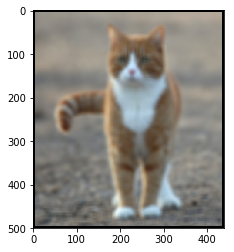

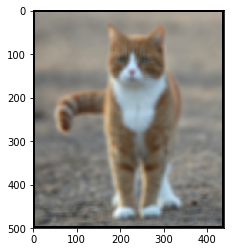

In [17]:
# Check your blurred image 
img = plt.imread('cat.png').astype(np.float) / 255
out = blur_filter(img)
out -= out.min()
out /= out.max()

correct = plt.imread('blur_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

In [18]:
def sobel_filter(img):
    """
    Use your convolution function to filter your image with a vertical sobel kernel to find vertical edges
    """
    sobel_y = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
    sobel_x = [[1, 0, -1 ],
            [2, 0, -2],
            [1, 0, -1]]
    sobel_y = np.array(sobel_y)
    sobel_x = np.array(sobel_x)
    # Your code here
    out = np.zeros(img.shape)

    G_y = convolution(img, sobel_y)
    G_x = convolution(img, sobel_x)

    return np.sqrt(G_x**2+G_y**2)

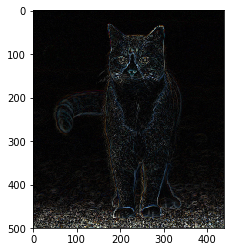

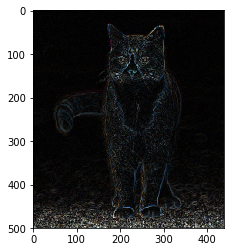

In [19]:
# Check the sobel image 
out = sobel_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('sobel_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()